In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from PIL import Image

### Example 1: 1-Dimensional Gaussian Mixture

In [2]:
means=[2,5,8]
stds=[0.2, 0.5, 0.8]
weights=[0.3, 0.3, 0.4]

In [3]:
mixture_idx = np.random.choice(3, size=10000, replace=True, p=weights)

In [4]:
# generate 10000 possible values of the mixture
X = np.fromiter((ss.norm.rvs(loc=means[i], scale=stds[i]) for i in mixture_idx), dtype=np.float64)

In [5]:
# create x axis of the plot 
xs = np.linspace(X.min(), X.max(), 300)
ps = np.zeros_like(xs)

In [6]:
for mu, s, w in zip(means, stds, weights):
    ps += ss.norm.pdf(xs, loc=mu, scale=s) * w

In [7]:
# sort X in ascending order for plotting purpose
X_sorted = np.sort(X.reshape(-1)).reshape(-1,1)

In [8]:
# fit the GMM
gmm = GMM(n_components=3, random_state=10)
gmm.fit(X_sorted)

GaussianMixture(n_components=3, random_state=10)

In [9]:
# store the predicted probabilities in y1_prob
probs = gmm.predict_proba(X_sorted)

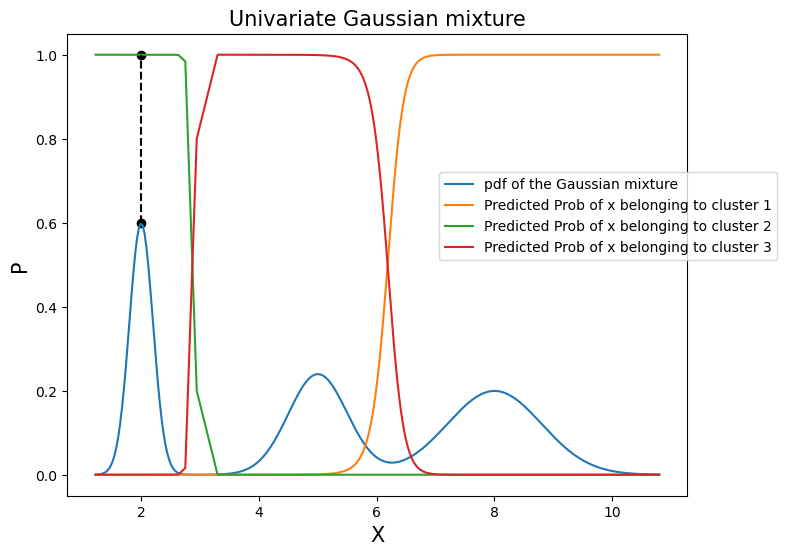

In [10]:
# plot the Gaussian mixture pdf
plt.figure(figsize=(8,6))
plt.plot(xs, ps, label='pdf of the Gaussian mixture')
plt.xlabel("X", fontsize=15)
plt.ylabel("P", fontsize=15)
plt.title("Univariate Gaussian mixture", fontsize=15)

# plot the predicted prior probabilities
plt.plot(X_sorted, probs[:,0], label='Predicted Prob of x belonging to cluster 1')
plt.plot(X_sorted, probs[:,1], label='Predicted Prob of x belonging to cluster 2')
plt.plot(X_sorted, probs[:,2], label='Predicted Prob of x belonging to cluster 3')
plt.scatter(2, 0.6, color='black')
plt.scatter(2, 1.0, color='black')
plt.plot([2, 2], [0.6, 1.0],'--', color='black')
plt.legend(bbox_to_anchor=(0.6,0.7), borderaxespad=0)

### Example 3: Image Segmentation

**OpenCV** (short for Open Source Computer Vision Library) is an open-source library that helps computers see, analyze, and understand images and videos, kind of like how humans do. It’s written in C++ but has powerful bindings for Python, which is why it's so popular in computer vision and machine learning projects.

📸 What can OpenCV do?
Here are some common things you can do with OpenCV:

🧠 Computer Vision Tasks
- Read and display images or video streams
- Detect edges (e.g., with Canny edge detection)
- Object detection (e.g., face detection using Haar cascades)
- Image transformations (resize, rotate, crop, etc.)
- Image filtering (blur, sharpen, thresholding)
- Detect motion, track objects

Work with color spaces (RGB, HSV, etc.)


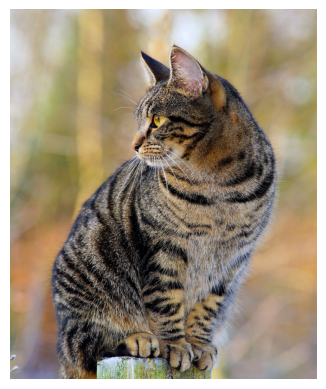

In [11]:
img = np.array(Image.open('cat.jpeg'))
plt.imshow(img)
plt.axis('off')
plt.show()

In [12]:
x = img.reshape(-1, 3)
print(x.shape)

(3054720, 3)


In [13]:
gmm = GMM(n_components=8, covariance_type='tied').fit(x)
labels = gmm.predict(x)
labels

array([6, 6, 6, ..., 0, 0, 0])

In [14]:
seg = np.zeros(x.shape)
seg

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [15]:
for label in range(8):
    seg[labels == label] = gmm.means_[label]
seg

array([[211.58665967, 212.72104885, 216.19589735],
       [211.58665967, 212.72104885, 216.19589735],
       [211.58665967, 212.72104885, 216.19589735],
       ...,
       [156.11621245, 144.41405094, 137.6521055 ],
       [156.11621245, 144.41405094, 137.6521055 ],
       [156.11621245, 144.41405094, 137.6521055 ]])

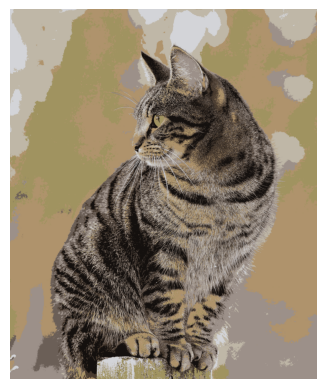

In [16]:
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)
plt.axis('off')
plt.show()